## <p style="text-align: right;"> &#9989; Put your name here</p>

# CMSE 201.007: Quiz 4

The goal of this quiz is to give you the opportunity to test out some of the skills that you've developed thus far this semester.

**Do your own work:** This quiz is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. There is zero tolerance for violations of academic integrity.

This quiz is open internet and open resources (past assignments and code portfolio). No person-to-person communication is allowed, online or otherwise.

**Quiz duration:** 120 minutes.

---

## 1. Compartmental models [10 points]

Use `solve_ivp` from SciPy to numerically solve the compartmental model

\begin{align}
    \frac{dx}{dt} &= t y \\
    \frac{dy}{dt} &= x
\end{align}


for times `t = np.linspace(-10, 3, 100)` with initial conditions $x(0) = 1$ and $y(0) = 0$. Plot the solution ($x(t)$ and $y(t)$) vs. time $t$ with a legend and $x$-axis label.

*Fun fact:* This model, from an equation known as Airy's differential equation, is notable because its solutions are oscillatory for $t < 0$ and exponential for $t > 0$. It has applications from semiconductor manufacturing to optical physics.

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
import matplotlib.pyplot as plt

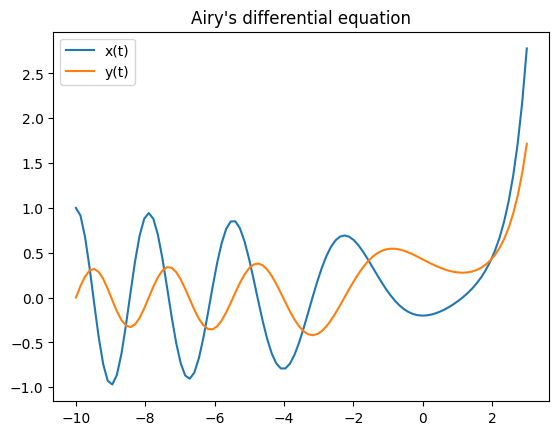

In [11]:
# Your code here.
t = np.linspace(-10,3,100)
def airys(t,current_state):
    x, y = current_state
    dxdt = t * y
    dydt = x
    return dxdt, dydt

x0 = 1
y0 = 0
initial = [x0,y0]

result = solve_ivp(airys,(-10,3),initial, t_eval=t)
xt = result.y[0,:]
yt = result.y[1,:]

plt.plot(t,xt, label = 'x(t)')
plt.plot(t,yt, label = 'y(t)')
plt.legend()
plt.title('Airy\'s differential equation')
plt.show()

**Answer** the following questions:

1. What is the argument `t_eval` of `solve_ivp`?
1. Describe one way you could check the correctness of your solution.

<font size=6 color="#009600">&#9998;</font>  <br>
    1. *t_eval evaluates the differential equation for a list of time values* <br>
    2. *I can check correctness by solving the equation analytically, if such a solution exists, or by checking x,y,dx,and dy at various values*

---

## 2. Data visualization and interpretation [10 points]

There's a file on d2l called `life.csv` which contains life expectancy vs. time for different countries (Source: [Our World In Data](https://ourworldindata.org/life-expectancy)). Follow the steps of this problem to visualize and interpret how the United States compares to the countries with the highest life expectancy.

First, use Pandas to read in the data.

In [14]:
# Your code here.
data = pd.read_csv('life.csv')

Now, run the next cell to find countries in which the life expectancy has been at least 84 years. *Note*: This assumes you named the dataframe `data` when you read it in.

In [15]:
age = 84
top_countries = list(set(data[data["Life Expectancy"] > age]["Country"]))

print(f"Countries in which the life expectancy has been greater than {age}:", top_countries)

Countries in which the life expectancy has been greater than 84: ['Liechtenstein', 'Monaco', 'Macao', 'Japan', 'Australia', 'Hong Kong']


(Note: Some "Countries" are actually regions.)

The following cell visualizes this data using Seaborn. **Do this:** Add the US life expectancy vs. year to the plot made by Seaborn using a scatter plot to see how the US compares.

*Hint*: You can use Matplotlib (not Seaborn) to make a scatter plot of the US data. It should be added to the same plot made by Seaborn automatically.

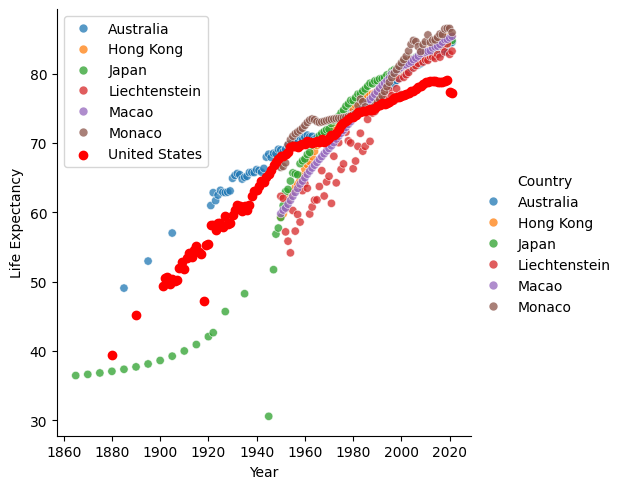

In [34]:
import numpy as np
import seaborn as sns

sns.relplot(
    data=data[np.isin(data["Country"], top_countries)],
    x="Year",
    y="Life Expectancy",
    hue="Country",
    alpha=0.75,
)

# Your code here.
usa_data = data[data['Country'] == 'United States']
plt.scatter(usa_data['Year'],usa_data['Life Expectancy'], color = 'r', label = 'United States')
plt.legend()
plt.show()

**Answer** the following questions to interpret the data:

1. Approximately what years, if any, has the US life expectancy been in the top three?
1. Referring to principles of good data visualization (Day 20), describe at least two ways to improve this plot. (You don't have to make any changes to the plot, just describe how it could be improved.)

<font size=6 color="#009600">&#9998;</font> 

1. 1950s
2. Options: <br>Add USA to relplot instead of using two funcitions, makes plotting style more uniform <br> Make another plot focusing on the space where the data is all overlapping (post 1960s) <br> Make points smaller to reduce overlap


---
## Code portfolio [10 points]

Turn in your code portfolio along with your quiz to D2L.

---

### Congratulations, you're done!

Submit this quiz by uploading it to the course Desire2Learn web page.  Go to the "Quizzes" section, find the submission folder link for Quiz #4, and upload it there.

**Make sure the quiz you submit is the quiz you want me to grade,** for example by downloading your submission and checking it contains your completed work.